In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from ramannoodles import spectrafit

In [2]:
# open spectra library
shoyu_data_dict = pickle.load(open('../raman_spectra/shoyu_data_dict.p', 'rb'))
# list keys
sorted(shoyu_data_dict.keys())

['2-PROPANOL',
 'CARBON DIOXIDE',
 'CARBON MONOXIDE',
 'DIMETHYL KETONE',
 'ETHYL ALCOHOL',
 'FORMIC ACID',
 'WATER']

/Users/Parker1/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


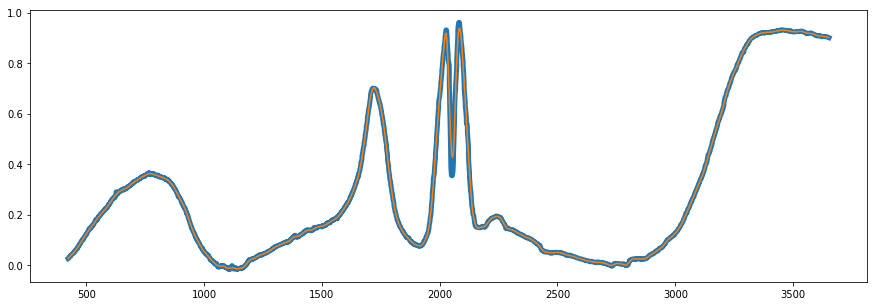

In [3]:
water = shoyu_data_dict['WATER']
x_water = water['x']
y_water = water['y']
y_water = spectrafit.subtract_baseline(y_water)


co = shoyu_data_dict['CARBON MONOXIDE']
x_co = co['x']
y_co = co['y']
y_co = spectrafit.subtract_baseline(y_co)

# x_pseudo = (co['x']+water['x'][:len(x_co)])/2
# y_pseudo =co['y']+water['y'][:len(x_co)]

x_pseudo = (x_co+x_water[:len(x_co)])/2
y_pseudo = y_co + y_water[:len(x_co)]
import rampy as rp
y_pseudo_smooth = rp.smooth(x_pseudo,y_pseudo,method="savgol",window_length=51, polyorder=3)

plt.figure(figsize = (15,5))
plt.plot(x_pseudo, y_pseudo, linewidth=5)
plt.plot(x_pseudo, y_pseudo_smooth)

In [4]:
# detect peaks
peaks = spectrafit.find_peaks(x_pseudo, y_pseudo_smooth, thres=0.25, min_dist=50)

In [5]:
# assign parameters for least squares fit
mod, pars = spectrafit.lorentz_params(peaks)

In [6]:
# fit the model to the data
out = spectrafit.model_fit(x_pseudo, y_pseudo, mod, pars, report=True)

[[Model]]
    ((((((Model(lorentzian, prefix='p1_') + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_')) + Model(lorentzian, prefix='p4_')) + Model(lorentzian, prefix='p5_')) + Model(lorentzian, prefix='p6_')) + Model(lorentzian, prefix='p7_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58000
    # data points      = 3574
    # variables        = 28
    chi-square         = 16.6983921
    reduced chi-square = 0.00470908
    Akaike info crit   = -19122.5424
    Bayesian info crit = -18949.4621
[[Variables]]
    p1_sigma:      150.009130 (init = 1)
    p1_center:     761.179657 (init = 771.1797)
    p1_amplitude:  179.364015 (init = 1)
    p1_fwhm:       300.018260 == '2.0000000*p1_sigma'
    p1_height:     0.36234683 (init = 0.3623468)
    p2_sigma:      65.4913018 (init = 1)
    p2_center:     1718.52208 (init = 1721.151)
    p2_amplitude:  136.735725 (init = 1)
    p2_fwhm:       130.982604 == '2.0000000*p2_sigma'
    p2_height:     0

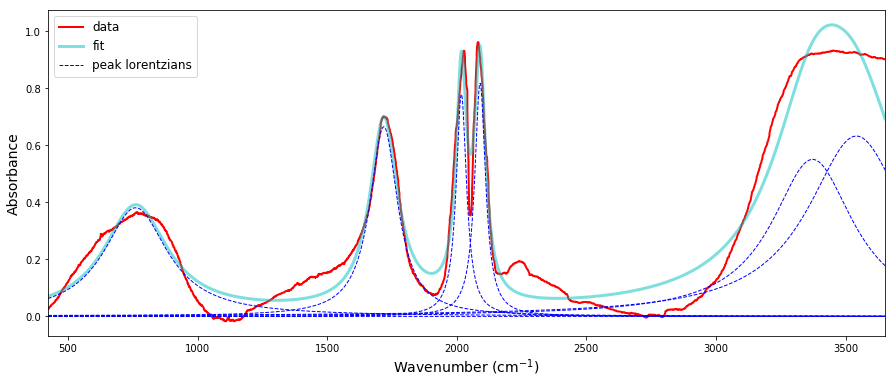

In [7]:
# plot fit results
spectrafit.plot_fit(x_pseudo, y_pseudo, out, plot_components=True)

# second fit
This second fit is a fit of the first fit after peak detecting again. This will weed out bad peak identification from the first fit due to noise in the data. It will require not processing power

In [8]:
y_pseudo2 = out.best_fit

In [9]:
# detect peaks
peaks = spectrafit.find_peaks(x_pseudo, y_pseudo2, thres=0.25, min_dist=50)

In [10]:
# assign parameters for least squares fit
mod, pars = spectrafit.lorentz_params(peaks)

In [11]:
# fit the model to the data
out = spectrafit.model_fit(x_pseudo, y_pseudo2, mod, pars, report=True)

[[Model]]
    ((((Model(lorentzian, prefix='p1_') + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_')) + Model(lorentzian, prefix='p4_')) + Model(lorentzian, prefix='p5_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 326
    # data points      = 3574
    # variables        = 20
    chi-square         = 0.62430863
    reduced chi-square = 1.7566e-04
    Akaike info crit   = -30884.2177
    Bayesian info crit = -30760.5889
[[Variables]]
    p1_sigma:      148.333522 (init = 1)
    p1_center:     761.023027 (init = 761.0135)
    p1_amplitude:  177.295995 (init = 1)
    p1_fwhm:       296.667044 == '2.0000000*p1_sigma'
    p1_height:     0.39154435 (init = 0.3915443)
    p2_sigma:      64.6127891 (init = 1)
    p2_center:     1718.47374 (init = 1718.892)
    p2_amplitude:  134.793655 (init = 1)
    p2_fwhm:       129.225578 == '2.0000000*p2_sigma'
    p2_height:     0.69983068 (init = 0.6998307)
    p3_sigma:      24.1553615 (init = 1)
    

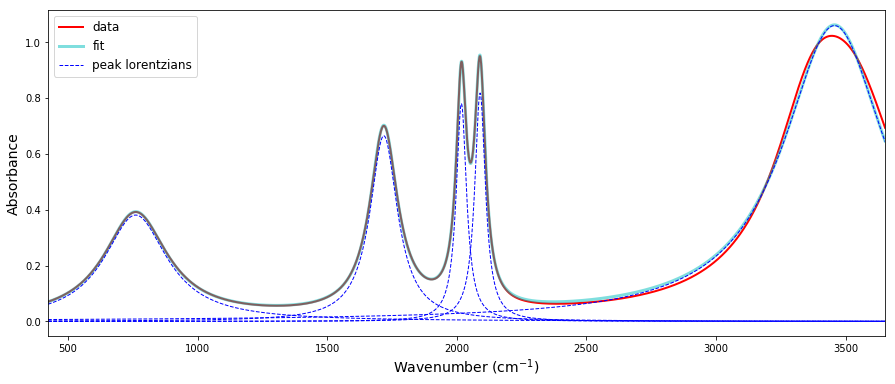

In [12]:
# plot fit results
spectrafit.plot_fit(x_pseudo, y_pseudo2, out, plot_components=True)

Notes from Parker: I really like this idea of fitting twice. It hardly takes any more time since the curve is so close to a sum or lorentzians anyways.

In [13]:
water = shoyu_data_dict['WATER']
x_water = water['x']
y_water = water['y']
y_water = spectrafit.subtract_baseline(y_water)

co = shoyu_data_dict['CARBON MONOXIDE']
x_co = co['x']
y_co = co['y']
y_co = spectrafit.subtract_baseline(y_co)

In [14]:
water_data = list(zip(x_water, y_water))
water_data

water_data_clean = []
for i in range(1, len(water_data)-1):
    if water_data[i][0] == water_data[i-1][0]:
        pass
    else:
        water_data_clean.append(water_data[i])

print(len(water_data))
print(len(water_data_clean))

3917
3132


In [15]:
co_data = list(zip(x_co, y_co))
co_data

co_data_clean = []
for i in range(1, len(co_data)-1):
    if co_data[i][0] == co_data[i-1][0]:
        pass
    else:
        co_data_clean.append(co_data[i])

print(len(co_data))
print(len(co_data_clean))

3574
2858


In [16]:
x_water2, y_water2 = zip(*water_data_clean)
x_co2, y_co2 = zip(*co_data_clean)

In [17]:
from scipy import interpolate
water = interpolate.interp1d(x_water2, y_water2, kind='cubic')
co = interpolate.interp1d(x_co2, y_co2, kind='cubic')

In [18]:
water_range = np.arange(int(min(x_water2))+1, int(max(x_water2)), 1)
co_range = np.arange(int(min(x_co2))+1, int(max(x_co2)), 1)

In [19]:
y_water_interp = water(water_range)
y_co_interp = co(co_range)

In [20]:
print(min(water_range))
print(max(water_range))
print(min(co_range))
print(max(co_range))

390
3797
460
3801


In [21]:
# water has how many more data points before co?
print(min(water_range)-min(co_range))
# co has how mant more data points after water?
print(max(co_range)-max(water_range))
print(water_range[:70])
print(co_range[:-4])

-70
4
[390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407
 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425
 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443
 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459]
[ 460  461  462 ... 3795 3796 3797]


In [22]:
# first portion only contains water data
a_sum = y_water_interp[:70]
# second portion contains both
b_sum = y_water_interp[70:] + y_co_interp[:-4]
# third protion contains only co data
c_sum = y_co_interp[-4:]

In [23]:
total_sum = np.concatenate((a_sum, b_sum, c_sum))
total_range = np.arange(390, 3802, 1)
print(len(total_sum))
print(len(total_range))

3412
3412


In [24]:
total_range

array([ 390,  391,  392, ..., 3799, 3800, 3801])

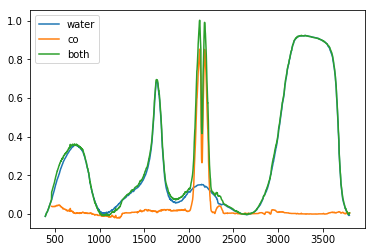

In [25]:
plt.plot(x_water2, y_water2, label='water')
plt.plot(x_co2, y_co2, label='co')
plt.plot(total_range, total_sum, label='both')
plt.legend()

In [55]:
def combine_spectra(compound_1, compound_2):
    # compound 1
    comp1 = shoyu_data_dict[compound_1]
    x_comp1 = comp1['x']
    y_comp1 = comp1['y']
    y_comp1 = spectrafit.subtract_baseline(y_comp1)
    # compound 2
    comp2 = shoyu_data_dict[compound_2]
    x_comp2 = comp2['x']
    y_comp2 = comp2['y']
    y_comp2 = spectrafit.subtract_baseline(y_comp2)
    # zip x and y values
    comp1_data = list(zip(x_comp1, y_comp1))
    comp2_data = list(zip(x_comp2, y_comp2))
    #clean comp1
    comp1_data_clean = []
    for i in range(1, len(comp1_data)-1):
        if comp1_data[i][0] == comp1_data[i-1][0]:
            pass
        else:
            comp1_data_clean.append(comp1_data[i])
    # clean comp2
    comp2_data_clean = []
    for i in range(1, len(comp2_data)-1):
        if comp2_data[i][0] == comp2_data[i-1][0]:
            pass
        else:
            comp2_data_clean.append(comp2_data[i])
    # unzip values
    x_comp1, y_comp1 = zip(*comp1_data_clean)
    x_comp2, y_comp2 = zip(*comp2_data_clean)
    # interpolate data
    comp1_int = interpolate.interp1d(x_comp1, y_comp1, kind='cubic')
    comp2_int = interpolate.interp1d(x_comp2, y_comp2, kind='cubic')
    # define ranges
    comp1_range = np.arange(int(min(x_comp1))+1, int(max(x_comp1)), 1)
    comp2_range = np.arange(int(min(x_comp2))+1, int(max(x_comp2)), 1)
    # run interpolations
    y_comp1_interp = comp1_int(comp1_range)
    y_comp2_interp = comp2_int(comp2_range)
    # zip interpolated values
    comp1_data_int = list(zip(comp1_range, y_comp1_interp))
    comp2_data_int = list(zip(comp2_range, y_comp2_interp))
    # add the two spectra
    combined = comp1_data_int + comp2_data_int
    # add by like
    d = {x:0 for x,_ in combined}
    for name,num in combined:
        d[name] += num
    sum_combined = list(map(tuple, d.items()))
    # unzip
    x_combined, y_combined = zip(*sum_combined)
    # plot original data and combined plot
    plt.figure(figsize=(15,5))
    plt.plot(x_comp1, y_comp1, 'b--', label=compound_1)
    plt.plot(x_comp2, y_comp2, 'c--', label=compound_2)
    plt.plot(x_combined, y_combined, 'r', label='Combination', linewidth=3, alpha=0.7)
    plt.legend()
    return x_combined, y_combined

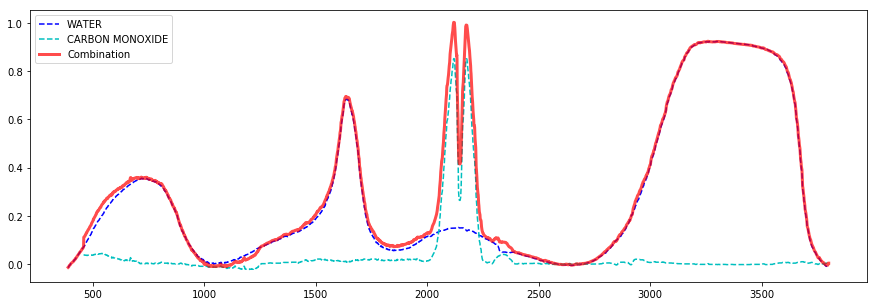

In [54]:
data = combine_spectra('WATER', 'CARBON MONOXIDE')